# Importing required libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
dataset = pd.read_csv("bank-data.csv")
dataset.head(15)

,Unnamed: 0,age,job,maritalStatus,education,defaultedCredit,balance,housingLoan,personalLoan,contactType,day_of_month,month,callDuration,numberTimesContactedInCampaign,daysSinceLastContact,totalTimesContacted,outcomeLastCampaign,subscribed
0,1,59,admin.,married,secondary,no,2343.0,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,2,56,admin.,married,secondary,no,45.0,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,3,41,technician,married,secondary,no,1270.0,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,4,55,services,married,secondary,no,2476.0,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,5,54,admin.,married,tertiary,no,184.0,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,6,42,management,single,tertiary,no,NaN,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,7,56,management,married,tertiary,no,830.0,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,8,60,retired,divorced,secondary,no,545.0,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,9,37,technician,married,secondary,no,NaN,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,10,28,services,single,secondary,no,5090.0,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


In [3]:
dataset.describe(include = 'all')

,Unnamed: 0,age,job,maritalStatus,education,defaultedCredit,balance,housingLoan,personalLoan,contactType,day_of_month,month,callDuration,numberTimesContactedInCampaign,daysSinceLastContact,totalTimesContacted,outcomeLastCampaign,subscribed
count,11162.000000,11162.000000,11162,11162,11162,11162,9475.000000,11162,11162,11162,11162.000000,11162,11162.000000,11162.000000,11162.000000,11162.000000,11162,11162
unique,NaN,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,NaN,management,married,secondary,no,NaN,no,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,NaN,2566,6351,5476,10994,NaN,5881,9702,8042,NaN,2824,NaN,NaN,NaN,NaN,8326,5873
mean,5581.500000,41.231948,NaN,NaN,NaN,NaN,1824.106385,NaN,NaN,NaN,15.658036,NaN,371.993818,2.508421,51.330407,0.832557,NaN,NaN
std,3222.336187,11.913369,NaN,NaN,NaN,NaN,3414.744888,NaN,NaN,NaN,8.420740,NaN,347.128386,2.722077,108.758282,2.292007,NaN,NaN
min,1.000000,18.000000,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,1.000000,NaN,2.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,2791.250000,32.000000,NaN,NaN,NaN,NaN,282.000000,NaN,NaN,NaN,8.000000,NaN,138.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,5581.500000,39.000000,NaN,NaN,NaN,NaN,771.000000,NaN,NaN,NaN,15.000000,NaN,255.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,8371.750000,49.000000,NaN,NaN,NaN,NaN,2071.000000,NaN,NaN,NaN,22.000000,NaN,496.000000,3.000000,20.750000,1.000000,NaN,NaN


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 18 columns):
Unnamed: 0                        11162 non-null int64
age                               11162 non-null int64
job                               11162 non-null object
maritalStatus                     11162 non-null object
education                         11162 non-null object
defaultedCredit                   11162 non-null object
balance                           9475 non-null float64
housingLoan                       11162 non-null object
personalLoan                      11162 non-null object
contactType                       11162 non-null object
day_of_month                      11162 non-null int64
month                             11162 non-null object
callDuration                      11162 non-null int64
numberTimesContactedInCampaign    11162 non-null int64
daysSinceLastContact              11162 non-null int64
totalTimesContacted               11162 non-null int64
ou

In [5]:
dataset.shape

(11162, 18)

In [6]:
dataset['subscribed'].describe()

count     11162
unique        2
top          no
freq       5873
Name: subscribed, dtype: object

# Data cleaning

In [7]:
dataset = dataset.dropna()
dataset.describe(include = 'all')

,Unnamed: 0,age,job,maritalStatus,education,defaultedCredit,balance,housingLoan,personalLoan,contactType,day_of_month,month,callDuration,numberTimesContactedInCampaign,daysSinceLastContact,totalTimesContacted,outcomeLastCampaign,subscribed
count,9475.000000,9475.000000,9475,9475,9475,9475,9475.000000,9475,9475,9475,9475.000000,9475,9475.000000,9475.000000,9475.000000,9475.000000,9475,9475
unique,NaN,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,NaN,management,married,secondary,no,NaN,no,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,NaN,2210,5357,4610,9416,NaN,5157,8389,6868,NaN,2308,NaN,NaN,NaN,NaN,6925,4775
mean,5483.517889,41.284433,NaN,NaN,NaN,NaN,1824.106385,NaN,NaN,NaN,15.558100,NaN,373.589974,2.459208,53.755251,0.881794,NaN,NaN
std,3197.931234,12.129806,NaN,NaN,NaN,NaN,3414.744888,NaN,NaN,NaN,8.395232,NaN,346.923923,2.618663,110.447887,2.373007,NaN,NaN
min,1.000000,18.000000,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,1.000000,NaN,2.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,2746.500000,32.000000,NaN,NaN,NaN,NaN,282.000000,NaN,NaN,NaN,8.000000,NaN,140.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,5335.000000,39.000000,NaN,NaN,NaN,NaN,771.000000,NaN,NaN,NaN,15.000000,NaN,258.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,8247.500000,49.000000,NaN,NaN,NaN,NaN,2071.000000,NaN,NaN,NaN,21.000000,NaN,493.000000,3.000000,85.000000,1.000000,NaN,NaN


# Age considerations

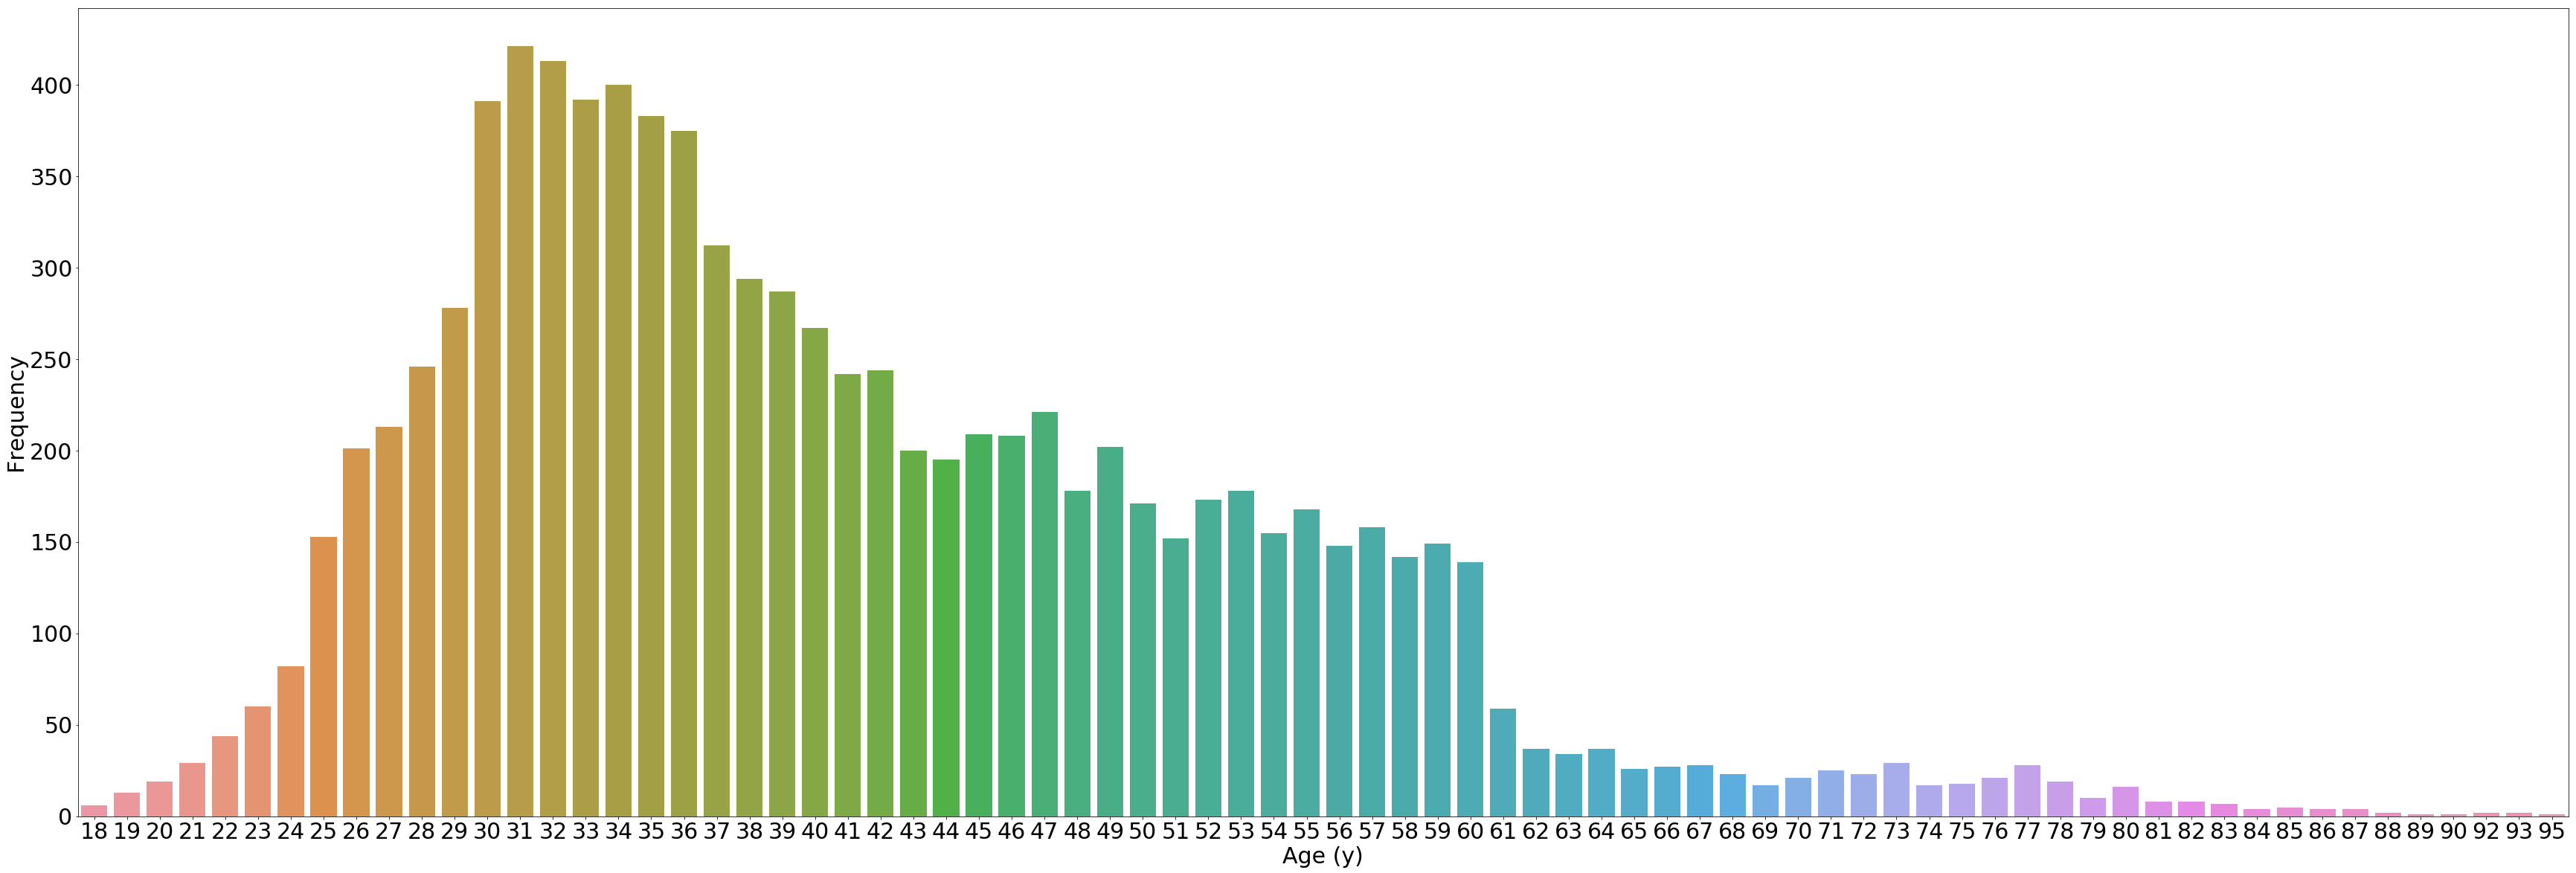

In [8]:
# The chart1 is a bar plot of age

chart1 = sns.countplot(x='age', data=dataset)
chart1.figure.set_size_inches(60,20)
chart1.set_xlabel("Age (y)", fontsize=30)
chart1.set_ylabel("Frequency", fontsize=30)
chart1.tick_params(labelsize = 30)
plt.show()

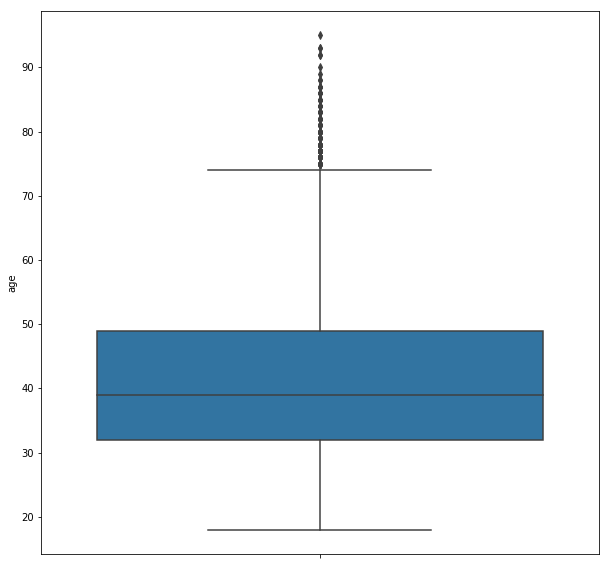

In [9]:
# the chart2 is a boxplot to see the variation of age
chart2 = sns.boxplot(y='age', data=dataset, )
chart2.figure.set_size_inches(10,10)
plt.show()

# Graphical analysis

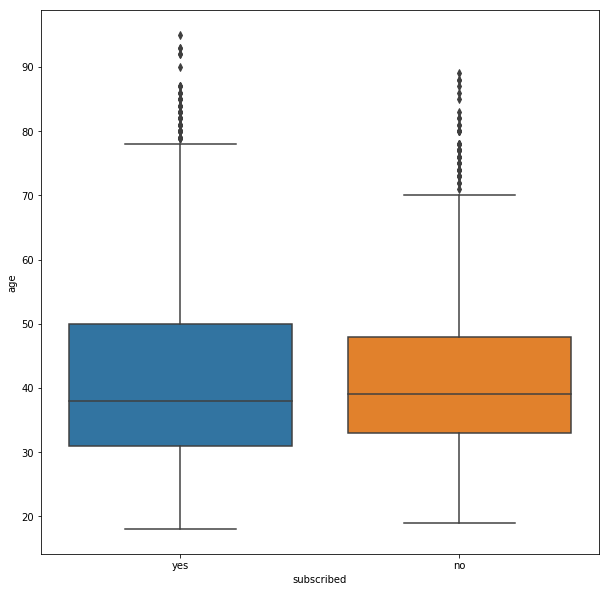

In [10]:
# chart3 is a box plot of age based on whether the telecampaing was succesful or not

chart3 = sns.boxplot(y='age', x ='subscribed', data=dataset)
chart3.figure.set_size_inches(10,10)
plt.show()

In [11]:
# creating a subset of the dataset considering people under age 60

dataset_young = dataset[dataset['age'] < 60]
dataset_young.describe()

,Unnamed: 0,age,balance,day_of_month,callDuration,numberTimesContactedInCampaign,daysSinceLastContact,totalTimesContacted
count,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000
mean,5583.034200,39.130643,1728.028842,15.599293,372.937642,2.492248,52.692544,0.846671
std,3235.866981,9.574688,3040.439648,8.397562,350.600265,2.674030,110.682158,2.363375
min,1.000000,18.000000,10.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,2725.750000,32.000000,270.000000,8.000000,137.000000,1.000000,-1.000000,0.000000
50%,5590.500000,37.000000,726.000000,15.000000,254.000000,2.000000,-1.000000,0.000000
75%,8385.250000,47.000000,1954.000000,21.000000,496.000000,3.000000,59.250000,1.000000
max,11160.000000,59.000000,66653.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


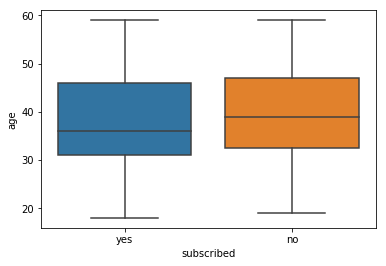

In [12]:
#Box plot of age based on whether the telecampaing was succesful or not; only for people younger than 60
sns.boxplot(y='age', x ='subscribed', data=dataset_young)
plt.show()

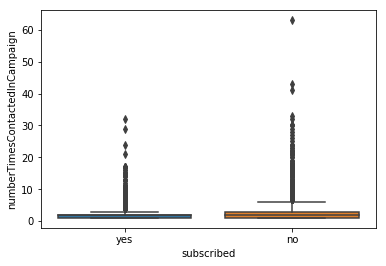

In [13]:
# the relationship between number of calls and the subscription outcome

sns.boxplot(y='numberTimesContactedInCampaign', x ='subscribed', data=dataset)
plt.show()

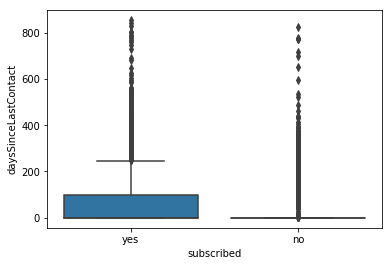

In [14]:
# the relationship between number of days since the last contact and the subscription outcome

sns.boxplot(y='daysSinceLastContact', x ='subscribed', data=dataset)
plt.show()

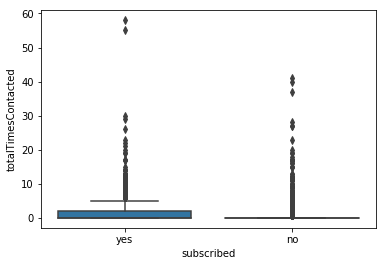

In [15]:
# the relationship between total times contacted and the subscription outcome

sns.boxplot(y='totalTimesContacted', x ='subscribed', data=dataset)
plt.show()

# Bar plots

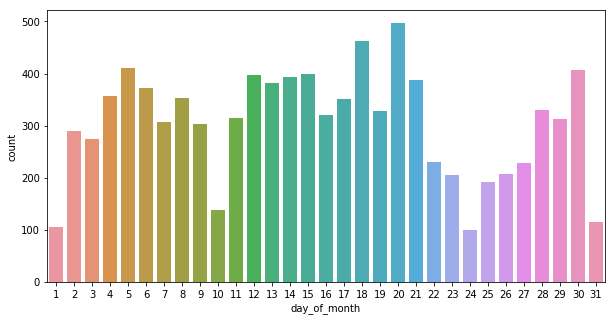

In [16]:
sns.countplot(x='day_of_month',data=dataset).figure.set_size_inches(10,5)
plt.show()

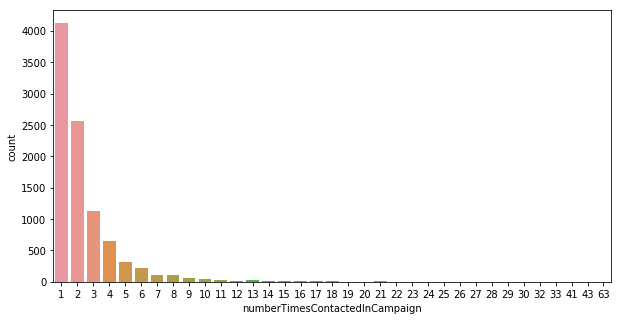

In [17]:
sns.countplot(x='numberTimesContactedInCampaign',data=dataset).figure.set_size_inches(10,5)

plt.show()

# Tabulated analysis (PIVOT TABLES)

In [18]:
# going to check if there are any obvious patterns.
print('JOB vs SUBSCRIPTION')
pd.crosstab(dataset['job'], dataset['subscribed'])

JOB vs SUBSCRIPTION


subscribed,no,yes
job,,
admin.,569,560
blue-collar,981,603
entrepreneur,170,97
housemaid,137,98
management,1024,1186
retired,222,473
self-employed,182,163
services,453,308
student,83,254


In [19]:
print('MARITAL STATUS vs SUBSCRIPTION')
pd.crosstab(dataset['maritalStatus'], dataset['subscribed'])

MARITAL STATUS vs SUBSCRIPTION


subscribed,no,yes
maritalStatus,,
divorced,510,512
married,2902,2455
single,1363,1733


In [20]:
print('EDUCATION vs SUBSCRIPTION')
pd.crosstab(dataset['education'], dataset['subscribed'])

EDUCATION vs SUBSCRIPTION


subscribed,no,yes
education,,
primary,718,520
secondary,2459,2151
tertiary,1392,1787
unknown,206,242


In [21]:
print('HOUSE LOAN vs SUBSCRIPTION')
pd.crosstab(dataset['housingLoan'], dataset['subscribed'])

HOUSE LOAN vs SUBSCRIPTION


subscribed,no,yes
housingLoan,,
no,2083,3074
yes,2692,1626


# Tabulated Graphical Analysis (PIVOT CHARTS)

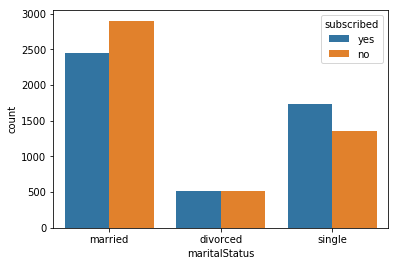

In [22]:
sns.countplot(x='maritalStatus', hue= 'subscribed', data = dataset)

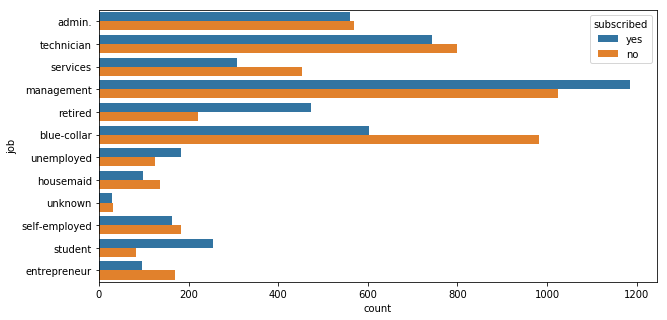

In [23]:
sns.countplot(y='job', hue= 'subscribed', data = dataset).figure.set_size_inches(10,5)

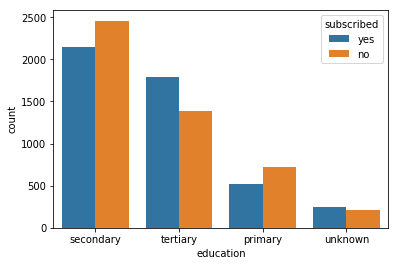

In [24]:
sns.countplot( x ='education', hue= 'subscribed', data= dataset)
plt.show()

# Summary by sns.pairplot

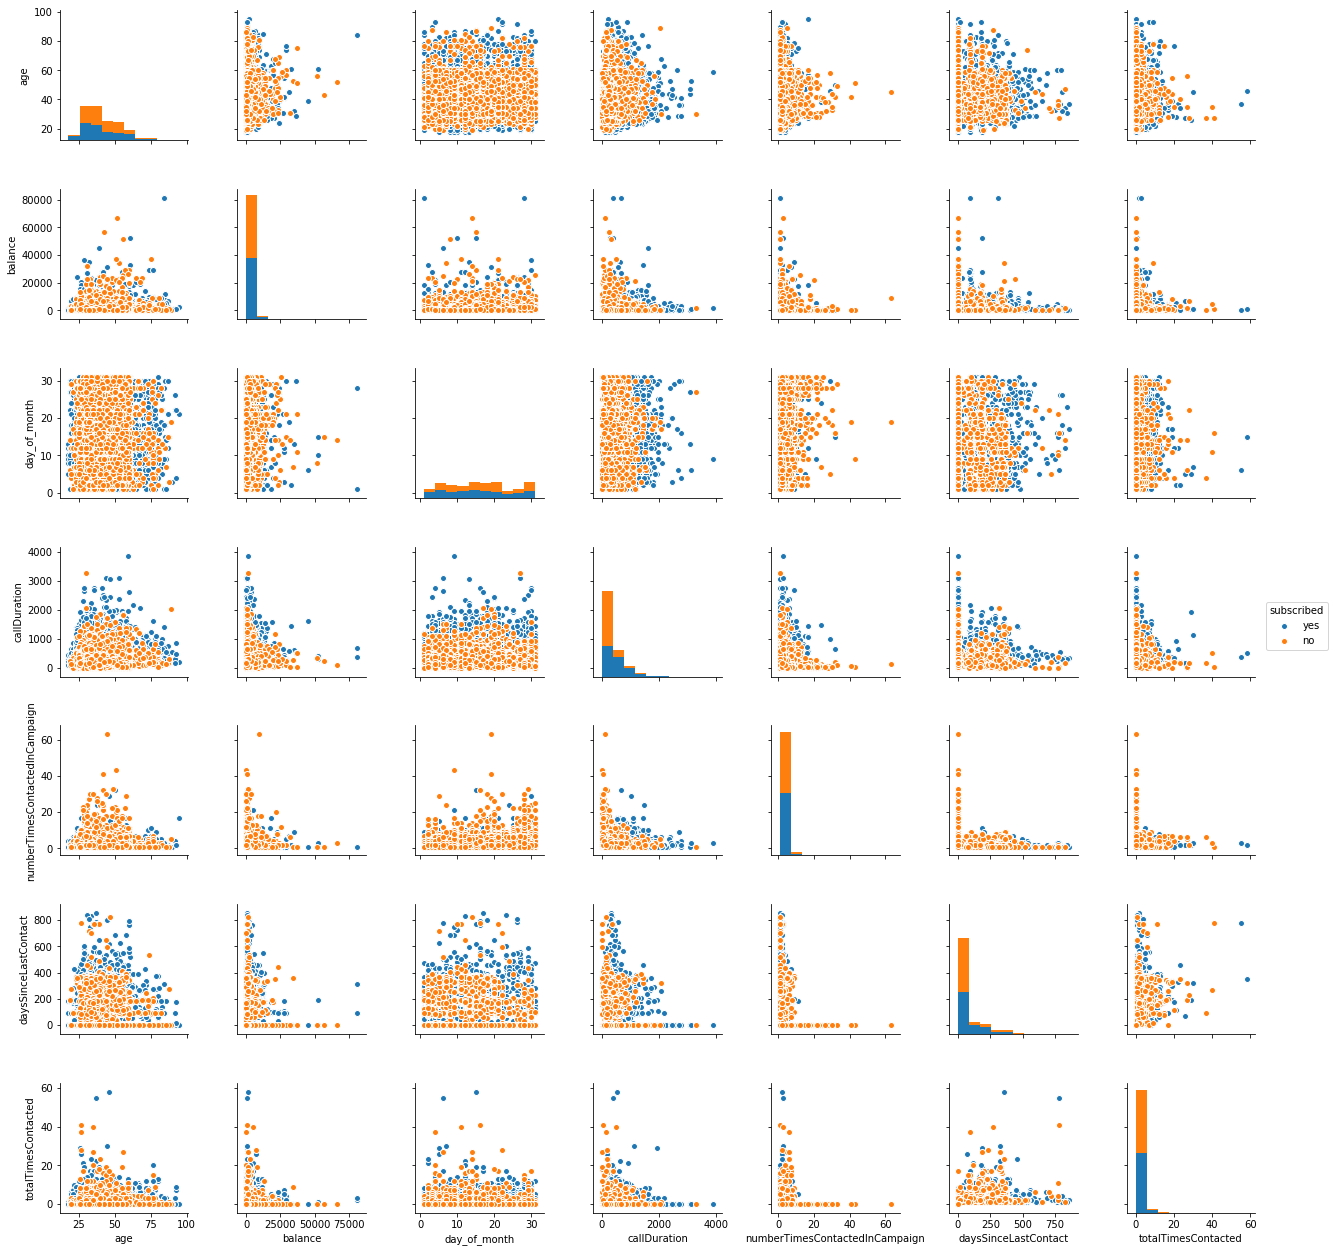

In [25]:
dataset = dataset.drop(columns="Unnamed: 0")
sns.pairplot(dataset, hue='subscribed')

In [26]:
dataset_dum = pd.get_dummies(dataset)
dataset_dum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9475 entries, 0 to 11159
Data columns (total 53 columns):
age                               9475 non-null int64
balance                           9475 non-null float64
day_of_month                      9475 non-null int64
callDuration                      9475 non-null int64
numberTimesContactedInCampaign    9475 non-null int64
daysSinceLastContact              9475 non-null int64
totalTimesContacted               9475 non-null int64
job_admin.                        9475 non-null uint8
job_blue-collar                   9475 non-null uint8
job_entrepreneur                  9475 non-null uint8
job_housemaid                     9475 non-null uint8
job_management                    9475 non-null uint8
job_retired                       9475 non-null uint8
job_self-employed                 9475 non-null uint8
job_services                      9475 non-null uint8
job_student                       9475 non-null uint8
job_technician            

# Correlation analysis

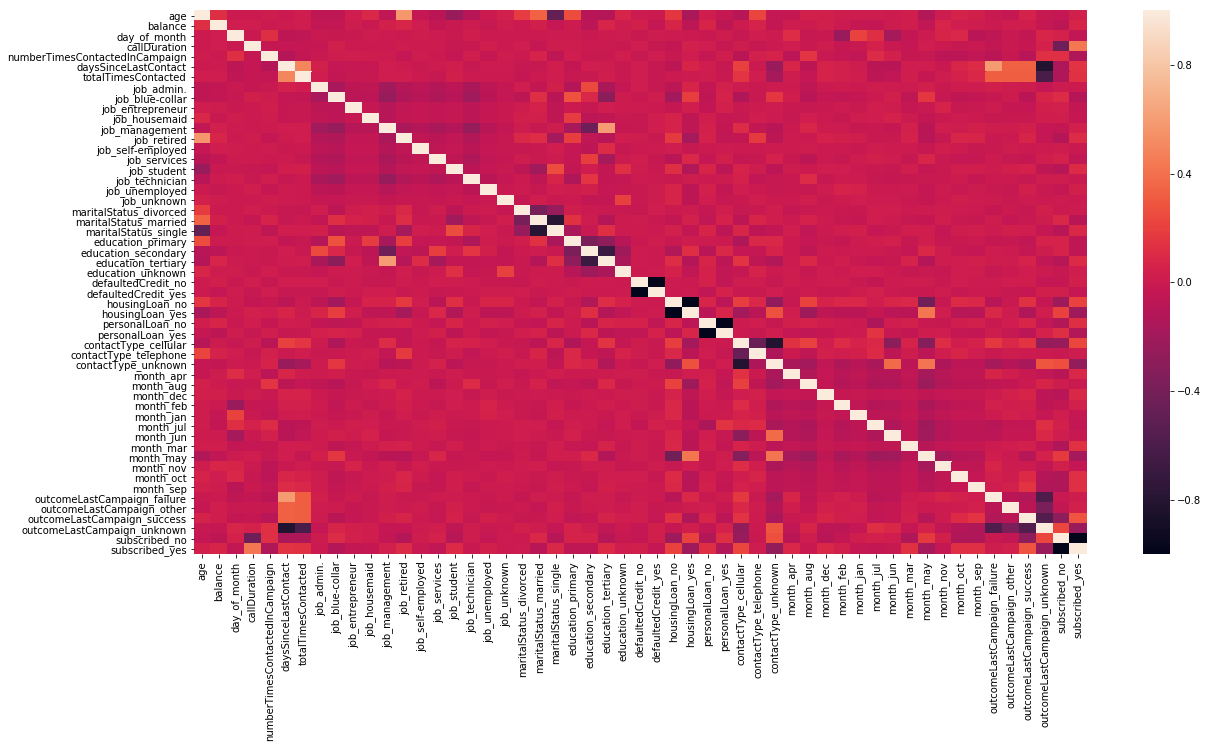

In [27]:
plt.figure(figsize=(20, 10))
sns.heatmap(dataset_dum.corr())

# Calculating r-coefficients and p-values

In [32]:
# loading the library researchpy which will help a lot in our analysis, in particular the function .corr_case and corr.pair. The function .corr_case generates three matrixes, one about the type of correlation, the second matrix shows the r coefficient and the last matrix shows the p-value of the correlation

import researchpy as rp
corr_type, corr_matrix, corr_ps = rp.corr_case(dataset_dum)

In [33]:
corr_ps.head(3)

,age,balance,day_of_month,callDuration,numberTimesContactedInCampaign,daysSinceLastContact,totalTimesContacted,job_admin.,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,outcomeLastCampaign_failure,outcomeLastCampaign_other,outcomeLastCampaign_success,outcomeLastCampaign_unknown,subscribed_no,subscribed_yes
age,0.0000,0.0000,0.5748,0.9533,0.3730,0.8579,0.0582,0.0000,0.0000,0.0308,...,0.0000,0.1321,0.0000,0.0003,0.3008,0.0090,0.0000,0.0527,0.0015,0.0015
balance,0.0000,0.0000,0.0673,0.0285,0.5836,0.5637,0.0447,0.0000,0.0001,0.3057,...,0.0000,0.0000,0.0293,0.1462,0.6679,0.0129,0.0042,0.0037,0.0000,0.0000
day_of_month,0.5748,0.0673,0.0000,0.4247,0.0000,0.0000,0.0000,0.2570,0.1132,0.2579,...,0.8667,0.0000,0.0000,0.0000,0.0000,0.1996,0.0001,0.0000,0.0000,0.0000


In [38]:
corr_table.head(3)

,r value,p-value,N
age & balance,0.1202,0.0000,9475
age & day_of_month,-0.0058,0.5748,9475
age & callDuration,-0.0006,0.9533,9475


In [37]:
# The r value and p-value are not numeric values!
corr_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1378 entries, age & balance to subscribed_no & subscribed_yes
Data columns (total 3 columns):
r value    1378 non-null object
p-value    1378 non-null object
N          1378 non-null int64
dtypes: int64(1), object(2)
memory usage: 83.1+ KB


In [39]:
# usiong pd.to_numeric we can solve the problem
corr_table['p-value']= pd.to_numeric(corr_table['p-value'])
corr_table['r value']= pd.to_numeric(corr_table['r value'])

In [40]:
corr_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1378 entries, age & balance to subscribed_no & subscribed_yes
Data columns (total 3 columns):
r value    1378 non-null float64
p-value    1378 non-null float64
N          1378 non-null int64
dtypes: float64(2), int64(1)
memory usage: 83.1+ KB


In [41]:
corr_table.head(2)

,r value,p-value,N
age & balance,0.1202,0.0000,9475
age & day_of_month,-0.0058,0.5748,9475


In [42]:
corr_table[(corr_table['r value'] > 0.5)]

,r value,p-value,N
age & job_retired,0.5703,0.0,9475
daysSinceLastContact & outcomeLastCampaign_failure,0.5900,0.0,9475
job_management & education_tertiary,0.5965,0.0,9475


In [43]:
corr_table[(corr_table['r value']  < -0.5)]

,r value,p-value,N
daysSinceLastContact & outcomeLastCampaign_unknown,-0.8164,0.0,9475
totalTimesContacted & outcomeLastCampaign_unknown,-0.6121,0.0,9475
maritalStatus_married & maritalStatus_single,-0.7946,0.0,9475
education_secondary & education_tertiary,-0.6917,0.0,9475
defaultedCredit_no & defaultedCredit_yes,-1.0000,0.0,9475
housingLoan_no & housingLoan_yes,-1.0000,0.0,9475
personalLoan_no & personalLoan_yes,-1.0000,0.0,9475
contactType_cellular & contactType_unknown,-0.8169,0.0,9475
outcomeLastCampaign_failure & outcomeLastCampaign_unknown,-0.5889,0.0,9475
outcomeLastCampaign_success & outcomeLastCampaign_unknown,-0.5670,0.0,9475


# Classification model

## Splitting the data

In [45]:
# Feature selection 
feature_cols = ['age', 'balance', 'day_of_month', 'callDuration',
       'numberTimesContactedInCampaign', 'daysSinceLastContact',
       'totalTimesContacted', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'maritalStatus_divorced',
       'maritalStatus_married', 'maritalStatus_single', 'education_primary',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'defaultedCredit_no', 'defaultedCredit_yes', 'housingLoan_no',
       'housingLoan_yes', 'personalLoan_no', 'personalLoan_yes',
       'contactType_cellular', 'contactType_telephone', 'contactType_unknown',
       'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'outcomeLastCampaign_failure',
       'outcomeLastCampaign_other', 'outcomeLastCampaign_success',
       'outcomeLastCampaign_unknown']
X = dataset_dum[feature_cols]
y = dataset.subscribed
X_train, X_test, y_train, y_test=train_test_split(X, y, 
                                                  test_size = 0.25,
                                                  random_state = 123)

In [46]:
# going to set up the model with 500 trees, using entropy as the parameter to find the optimal tree and with a maximum depth of 5 nodes. Then we are going to train the model using the function .fit
clf = RandomForestClassifier(n_estimators=500,criterion = 'entropy', max_depth=5,random_state=123)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

In [47]:
# Classify the test subset using .predict()
y_pred = clf.predict(X_test)

In [48]:
# Calculate the accuracy using metrics.accuracy_score(y_test,y_pred)
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.805403123680878


Text(91.68,0.5,'predicted values')

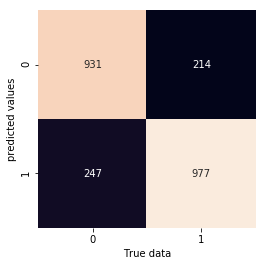

In [49]:
# y_test is a dataframe and to use the function confusion_matrix it is necessary to convert y_test to a list
from sklearn.metrics import confusion_matrix
y_true = y_test.tolist()
mat = confusion_matrix(y_true,y_pred)
sns.heatmap(mat.T, square =True, annot = True, fmt = 'd', cbar= False)
plt.xlabel('True data')
plt.ylabel('predicted values')

### add below additional stats about the model from Training a model paragraph:
### https://github.com/DecodedCo/data-fellowship/blob/master/modules/classification/python/practice/6_classification_modelling.md

In [52]:
# spaceholder

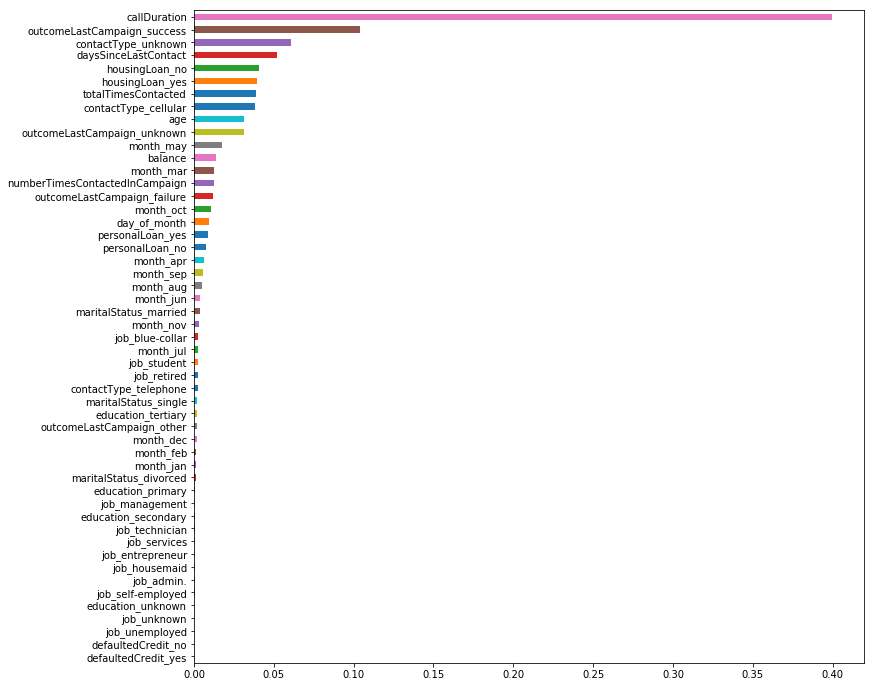

In [50]:
# Let's check which variables are the most important to classify the dataset
feature_importances = pd.Series(clf.feature_importances_, index = X.columns)
feature_importances = feature_importances.sort_values()
feature_importances.plot(kind='barh', figsize = (12,12))

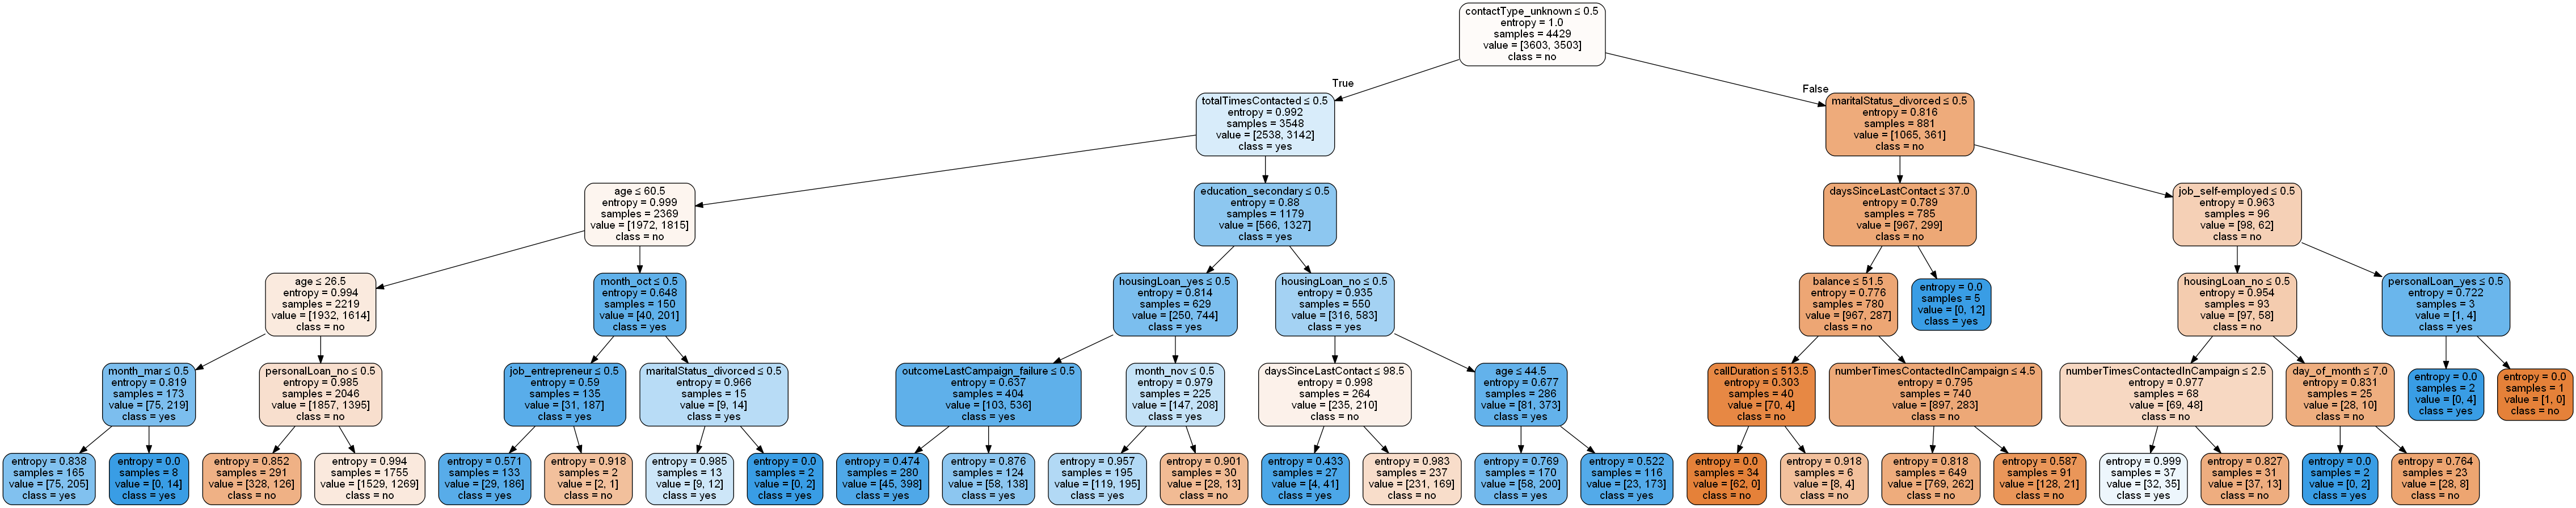

In [51]:
# You can also visualise the individual trees as we did in the workshop. Each tree represents a subset of the model. In this particular case we are interested in a single tree, the tree numer 90 but you can explore from the tree 0 to the the tree 499
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
estimator = clf.estimators_[90]
export_graphviz(estimator, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ['no', 'yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())